<a href="https://colab.research.google.com/github/valu3/machine_learning_practico/blob/clase-1/Copia_de_01_aprendizaje_supervisado_live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade scikit-learn

     |████████████████████████████████| 6.8MB 2.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import sklearn as sk
from sklearn.datasets import load_wine
import pandas as pd

X, y = load_wine(return_X_y=True, as_frame=True)

In [ ]:
a=load_wine()
a.keys()

print (a['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [ ]:
DecisionTreeClassifier? #abre ayuda

#hiperparametros
# Gini y entropy mide el corte. Antes se usaba information gain 
# Max_depth

In [ ]:
# Juga con max_depth!
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2) 
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

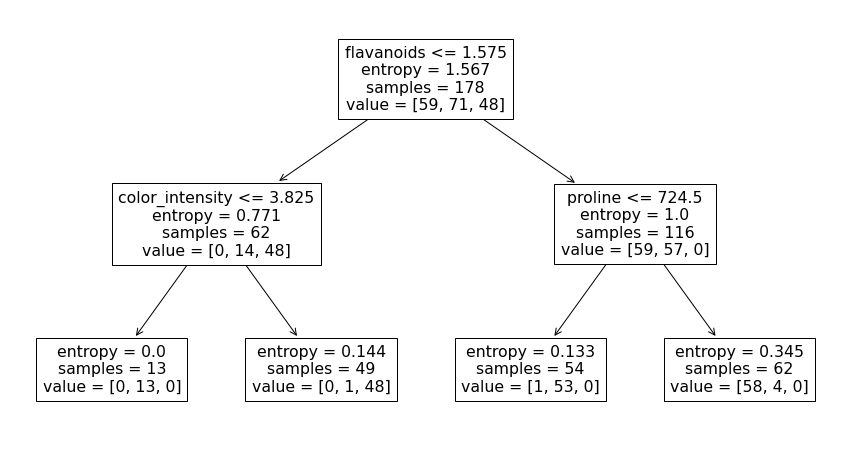

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=X.columns);

# Value (en el arbol) son la cantidad por clase 
# Hay que tener cuidado con la pronfundidad porque puede dejar pocas cantidades para definir la categoria(no es relevante)


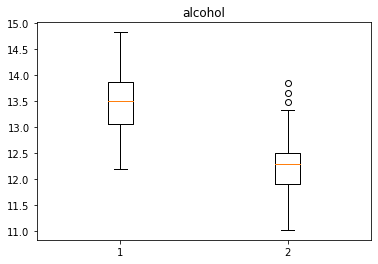

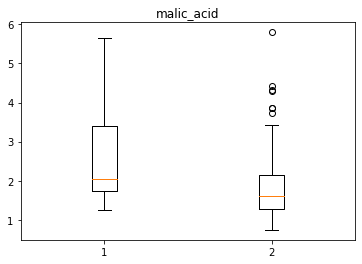

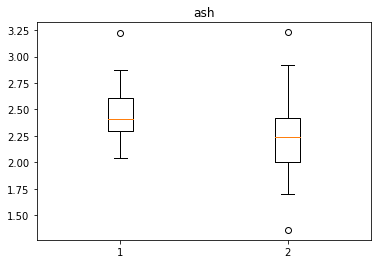

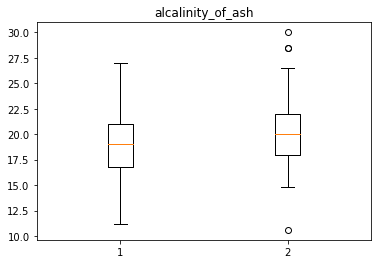

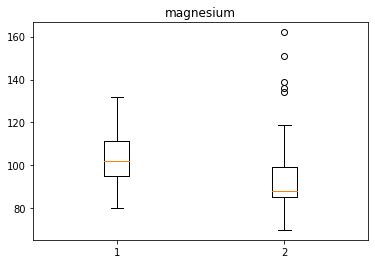

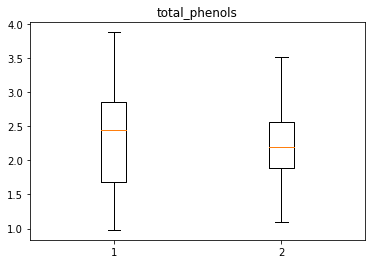

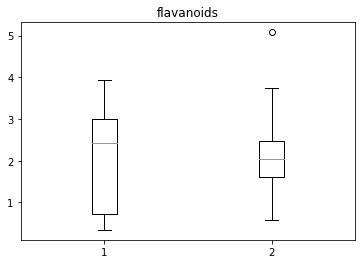

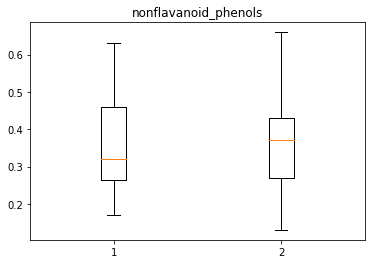

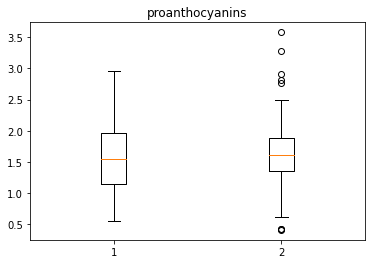

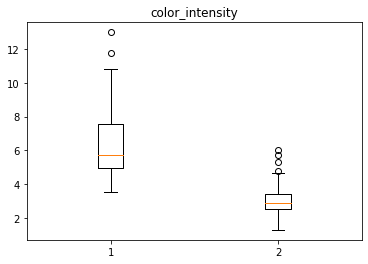

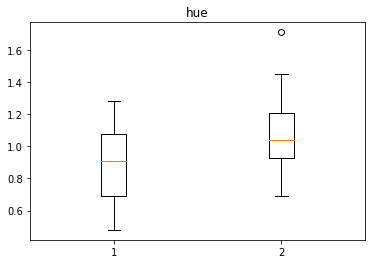

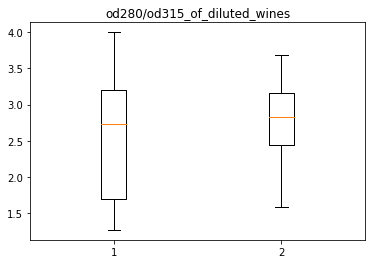

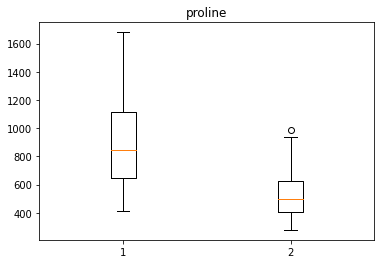

In [ ]:
# Vemos como se ven las distribuciones de las features en cada clase
# Con esto podemos darnos una idea de por qué el decision tree prioriza una por sobre la otra

for col in X.columns:
    col_vals = []
    for y_val in [0, 1]:
        col_vals.append(X[col][y == y_val])

    plt.figure()
    plt.title(col)
    plt.boxplot(col_vals)

# ver cómo define los cortes, color intensity funciona bien, se nota la diferencia entre ambas clases    

In [ ]:
#Predigo los valores de X
preds= dt.predict(X) 

In [ ]:
(y == preds).sum() 
# comparo lo predecido con las etiquetas para saber cuantas hizo bien del total de 178

172

In [ ]:
(y== preds).tolist().index(False) #busco el index de alguno de los que esta mal

43

In [ ]:
print('valor predecido: ', preds[43],'valor real: ', y.iloc[43])

Falso positivo para la clase 1 (vp)
Falso negativo para la clase 0 (vr)

valor predecido:  1 valor real:  0


## Miremos algunas metricas




Aprovechemos para jugar y ver como cambiar el max_depth mas arriba impacta en las metricas

**Métrica F1:**

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, f1_score

In [ ]:
preds = dt.predict(X)

preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
f1_score(y, dt.predict(X), average='weighted')

#como hay 3 clases (0,1,2) tira error
#Se suele calcular la metrica asumiendo que hay dos clases. La clase 1 vs el resto, la 2 vs el resto etc. 
#Evaluo precision y recall en esos problemas por separado y luego promedio: micro,macro,weighted
#precision y recall son los valores que usa F1 para el cálculo


0.9661807954410703

In [ ]:
prec = precision_score(y, dt.predict(X),average='weighted')
prec

0.9671587362799143

In [ ]:
rec = recall_score(y, dt.predict(X),average='weighted')
rec

0.9662921348314607

In [ ]:
# Solo para ver, efectivamente f1 es la ecuacion que vimos en clase?

2 * prec * rec / (prec + rec)

#el rdo es distinto, depende del average

0.9667252413438557

### Convertimos el problema a clasificación binaria 
Cambiamos todas las clases 2 por clases 0

In [ ]:
y[y == 2] = 0

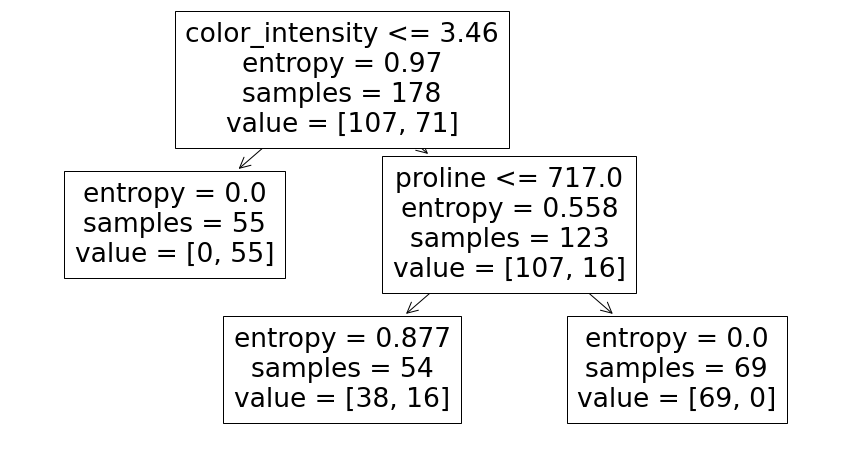

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy') 
dt.fit(X, y)

plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=X.columns);

In [ ]:
#ya no necesito el average porque es un problema de dos clases
f1= f1_score(y, dt.predict(X))
prec = precision_score(y, dt.predict(X))
rec = recall_score(y, dt.predict(X))
f1_calc= 2 * prec * rec / (prec + rec)

print('f1=',f1,', precision=',prec, ', recall=', rec)
print('el f1 calclulado es ',f1_calc, '. Entonces el valor es igual, depende del average que cambie el rdo antes')

f1= 0.873015873015873 , precision= 1.0 , recall= 0.7746478873239436
el f1 calclulado es  0.873015873015873 . Entonces el valor es igual, depende del average que cambie el rdo antes


## Seguimos mirando métricas

**Métrica ROC**

In [ ]:
dt.predict_proba(X)
#Devuelve matriz con tantas filas como ejemplos del data set 
#y dos columnas, probabilidad de que sea clase 0 y probabilidad de clase 1
#la suma de las dos columnas es 1

array([[1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       [

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


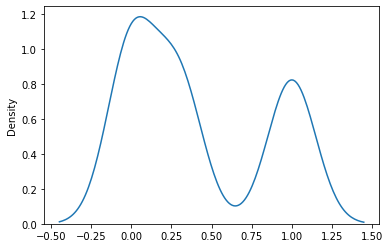

In [ ]:
import seaborn as sns

y_score = dt.predict_proba(X)[:,1] #nos quedamos con la probabilidad de que sea de la clase 1

sns.distplot(y_score, hist=False) #vemos que es bimodal

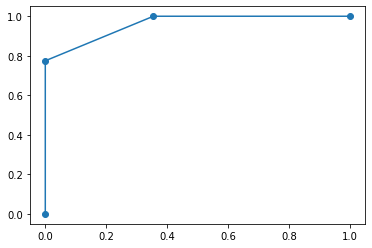

In [ ]:
#armamos la ROC curve
fpr, tpr, thresholds = roc_curve(y, y_score)
plt.plot(fpr, tpr, '-o')

In [ ]:
thresholds

array([2.       , 1.       , 0.2962963, 0.       ])

In [ ]:
# El decision tree tiene pocos scores (tantos scores como hojas)
# Podes ver que los scores se pueden calcular a partir del vector que dice "values" en la visualizacion mas arriba

set(y_score)

{0.0, 0.2962962962962963, 1.0}

In [ ]:
roc_auc_score(y, y_score)

0.9599842042911675

Que significa el score?
👆 cual es la probabilidad de ordenar bien 2 ejemplos al azar

score(ejemplo1) > score(ejemplo2) 

siendo y_1 = 1, y_2 = 0

Ver http://madrury.github.io/jekyll/update/statistics/2017/06/21/auc-proof.html

# Regresion logística

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y); 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
preds = lr.predict(X)

In [ ]:
f1_score(y, preds)

0.9436619718309859

In [ ]:
prec = precision_score(y, preds)
prec

0.9436619718309859

In [ ]:
rec = recall_score(y, preds)
rec

0.9436619718309859

In [ ]:
2 * prec * rec / (prec + rec)

0.9436619718309859

In [ ]:
y_score = lr.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_score)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


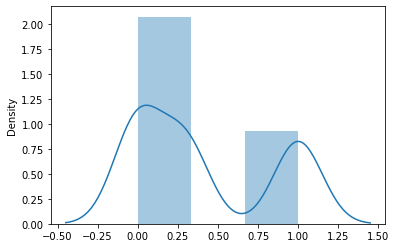

In [ ]:
import seaborn as sns

sns.distplot(y_score)

In [ ]:
set(y_score) #conjunto de todos los valores distintos que predice

#la regresión logistica usa funcion sigmoide, las features son valores numericos

{4.655634438919507e-09,
 5.873725379348219e-08,
 1.1806121656056025e-07,
 3.3084121375443443e-07,
 5.750703720077419e-07,
 7.439951063232232e-07,
 7.746706750103155e-07,
 8.500385038726341e-07,
 8.502000380269449e-07,
 9.184141069508631e-07,
 1.9571529693917693e-06,
 2.2722290763739914e-06,
 2.4287997828549804e-06,
 2.562584818642192e-06,
 5.085865702303236e-06,
 6.824873548422825e-06,
 6.860691251327052e-06,
 7.5241857659123144e-06,
 7.961843008042822e-06,
 1.2347144833349507e-05,
 1.93924198153303e-05,
 2.4155533340166652e-05,
 2.4988395854740655e-05,
 2.8094198154685832e-05,
 3.000432305785007e-05,
 3.067417954502137e-05,
 4.545903218012774e-05,
 4.577209178230179e-05,
 5.0096121458178926e-05,
 5.181461303057614e-05,
 5.190200241234675e-05,
 5.195096823684829e-05,
 0.00010225605911080243,
 0.00010707375940383632,
 0.00011315564381753734,
 0.00011788557704766168,
 0.00013061068795675393,
 0.00015162082212724707,
 0.00016219456770981086,
 0.00018492222436865266,
 0.0002204855427164719

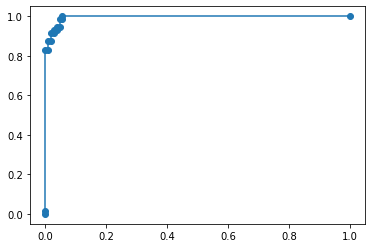

In [ ]:
plt.plot(fpr, tpr, '-o')

#La curva es muy buena, pero usé para probar los mismos datos con lo que entrené

In [ ]:
roc_auc_score(y, y_score)

0.9951296564433328